## Project Development

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# data = pd.read_csv(r"C:\Users\prern\Desktop\GEN AI\Deep_learning\churn_prediction\saved_model\datasets\Churn_Modelling.csv")
data = pd.read_csv("saved_model/datasets/Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### **1. Handle missing values**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#Remove duplicates values 
data.duplicated().sum()


#if u want to remove duplicate values 
## >>>> data.drop_duplicates(inplace=True)

0

to remove duplicate value 
>>> data.drop_duplicates(inplace=True)    #make changes in the real one

>>> data = data.drop_duplicates() ## create a copy 

In [8]:
##Remove unwanted columns

data.drop(labels=['RowNumber','CustomerId','Surname'], axis=1,inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
categorical_cols = data.select_dtypes(include='object').columns
numerical_cols = data.select_dtypes(exclude='object').columns

In [10]:
print(categorical_cols)
print(numerical_cols)

Index(['Geography', 'Gender'], dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [11]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [13]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [15]:
data.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

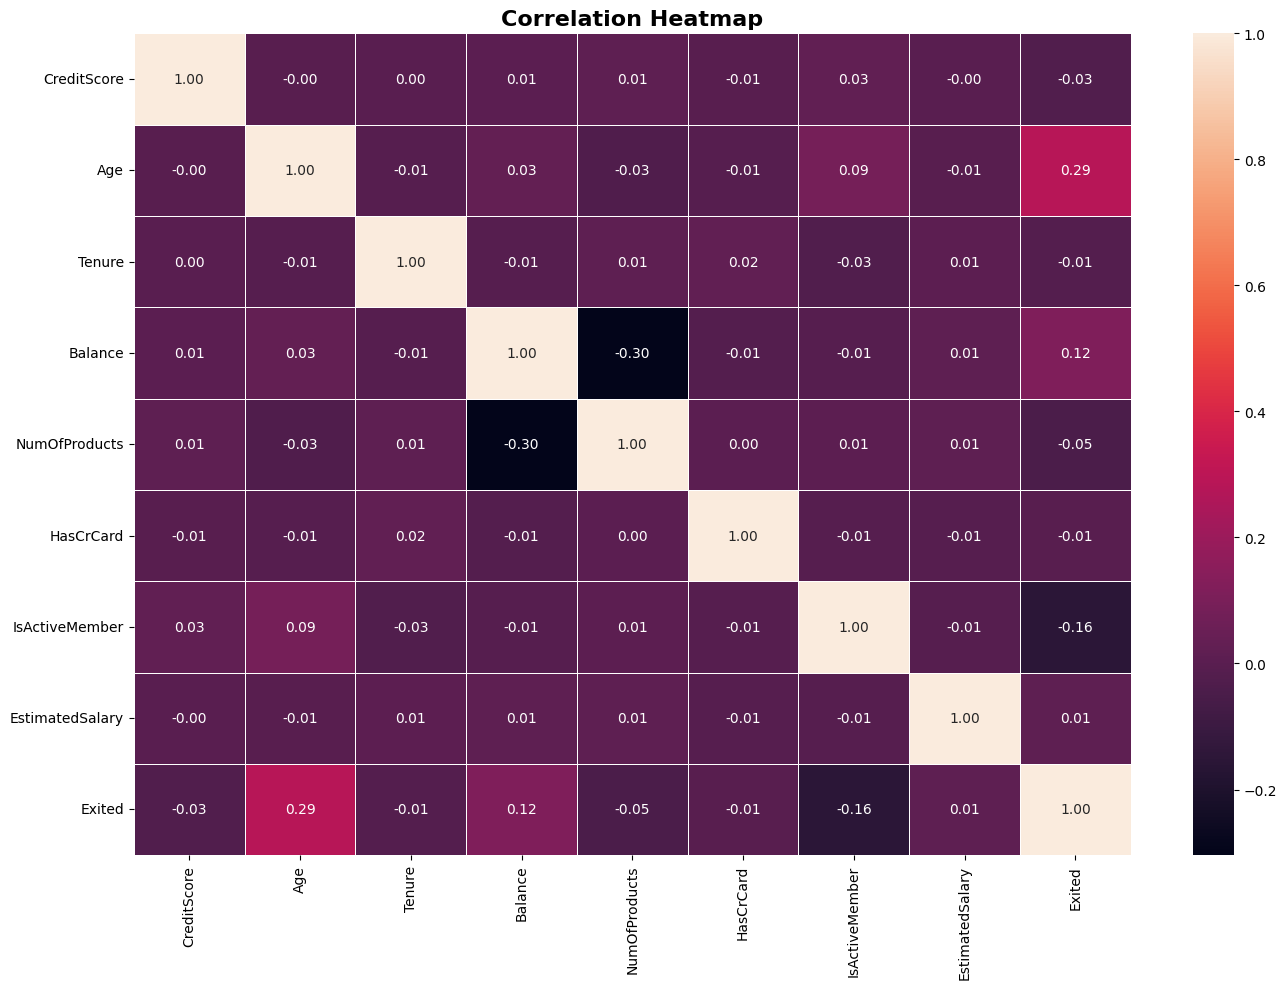

In [16]:
#Correlation ===>> Heatmap
plt.figure(figsize=(14,10))
corr_matrix = data[numerical_cols].corr()

sns.heatmap(
    corr_matrix,
    annot = True,  # show correaltion value (Displays actual numeric values inside each box)
    fmt=".2f",
    linewidths=0.5,
)

plt.title("Correlation Heatmap", fontsize=16,fontweight= "bold")
plt.tight_layout()    # badhiya graph bne , koi overlap na ho uske liye
plt.show()

In [17]:
#dependent and independent
X = data.drop('Exited', axis=1)
y = data['Exited']

In [18]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [19]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [20]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

print(categorical_cols)
print(numerical_cols)

Index(['Geography', 'Gender'], dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [21]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

#pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [22]:
gender_cat = ['Female','Male']
geo_cat = ['France','Spain','Germany']

In [23]:
num_pipeline= Pipeline(steps=[('scaler', StandardScaler())])
cat_pipeline = Pipeline(steps=[('ordinalencoder',OrdinalEncoder(
    categories=[geo_cat,gender_cat]))])

# columntransformer - ensure data is not leaking
preprocessor= ColumnTransformer(
                [("num_pipline",num_pipeline, numerical_cols),
                 ("cat_pipeline",cat_pipeline,categorical_cols)]
)

In [24]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2, random_state = 42)

In [25]:
# Applying the preprocessing pipelines to the training and testing data
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns= preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns= preprocessor.get_feature_names_out())

In [26]:
X_train.head()

,num_pipline__CreditScore,num_pipline__Age,num_pipline__Tenure,num_pipline__Balance,num_pipline__NumOfProducts,num_pipline__HasCrCard,num_pipline__IsActiveMember,num_pipline__EstimatedSalary,cat_pipeline__Geography,cat_pipeline__Gender
0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,0.0,1.0
1,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,2.0,1.0
2,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,1.0,1.0
3,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,0.0,0.0
4,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,0.0,1.0


In [27]:
num_pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [28]:
import pickle 
with open("saved_model/preprocessor.pkl","wb") as f:
    pickle.dump(preprocessor,f)

## ANN implementation

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential  # to create the layers in neural network
from tensorflow.keras.layers import Dense  # to create hidden nodes 
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [30]:
X_train.shape[1],

(10,)

In [31]:
#connecting input layer to the hidden layer 

model = Sequential([
            Dense(64, activation='relu',input_shape=(X_train.shape[1],)),   #it will create 64 nodes in hidden layers 
            Dense(32, activation='relu'),
            Dense(1,activation='sigmoid')
            ])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
import tensorflow 
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [34]:
model.compile(
    optimizer=opt,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [35]:
log_dir = "logs/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback= TensorBoard(log_dir= log_dir, histogram_freq=1)

In [36]:
# Early stopping 
early_stopping_callback = EarlyStopping(
    monitor= "val_loss",
    patience = 5,
    restore_best_weights = True
)

In [37]:
## Train midel 
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 100,
    callbacks = [tensorflow_callback, early_stopping_callback]
)

Epoch 1/100


250/250 [==============================] - 3s 6ms/step - loss: 0.4466 - accuracy: 0.8112 - val_loss: 0.3833 - val_accuracy: 0.8460
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3716 - accuracy: 0.8495 - val_loss: 0.3543 - val_accuracy: 0.8535
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3516 - accuracy: 0.8551 - val_loss: 0.3464 - val_accuracy: 0.8545
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3442 - accuracy: 0.8586 - val_loss: 0.3492 - val_accuracy: 0.8550
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3395 - accuracy: 0.8594 - val_loss: 0.3452 - val_accuracy: 0.8575
Epoch 6/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3368 - accuracy: 0.8591 - val_loss: 0.3438 - val_accuracy: 0.8620
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3331 - accuracy: 0.8639 - val_loss: 0.3458 - val_accuracy: 0.86

In [38]:
model.save("model.h5")

c:\Users\prern\.conda\envs\Cvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

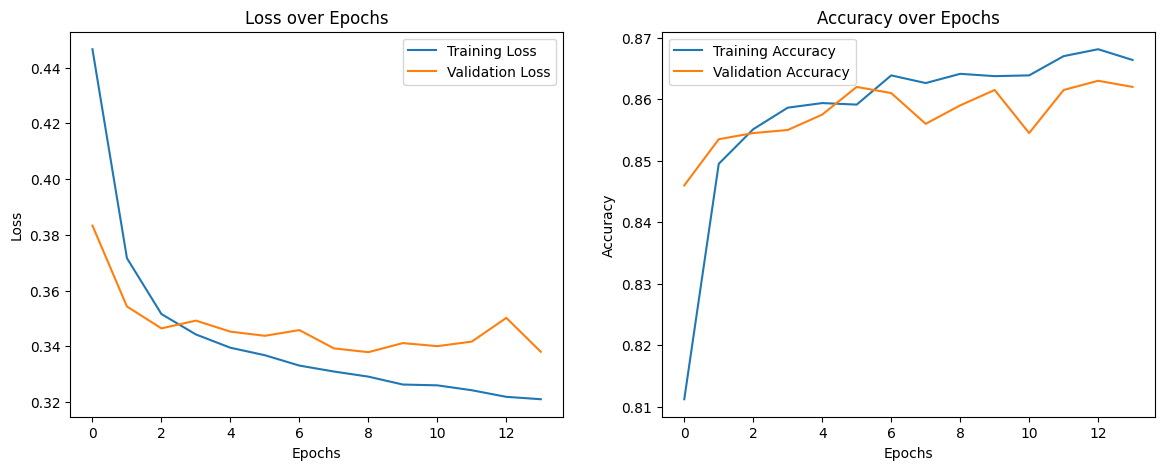

In [40]:
epochs = len(loss)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
## Load Tensorboard
%load_ext tensorboard

In [43]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 27224), started 0:00:21 ago. (Use '!kill 27224' to kill it.)